Download the SDSS quasara data.
- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

(Hint: `scipy.stats` is your best friend)

- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data 

(Hint: `astropy.cosmology` is another close friend). The best-fit cosmological model from the Plack data is:

### Importing the data and plotting it in a histogram

In [3]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

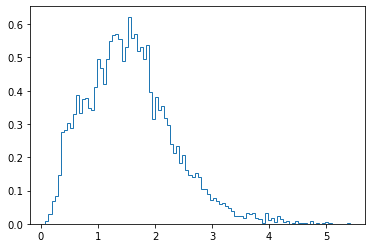

In [34]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
from scipy import stats, interpolate
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

Ndata = 10000

z.sort()
n, bins, patches = plt.hist(z, int(np.sqrt(Ndata)), histtype = 'step', density = True)

#each bin value is one edge:
#bins[0] is the left edge of the first bin, bins[1] is the right one. 
#Finally bins[sqrt(Ndata) + 1] is the right edge of the last bin.


### Rejection sampling

In [35]:
Nsamples = 1000

samples = np.empty(2, Nsamples)

#finding in which bin we are
def find_bin(x, bins):
    for i in range(len(bins)):
            if (x >= bins[i] and x < bins[i + 1]):  return i

while (len(samples) #cerca di mettere Nsamples):
    x = r.uniform(bins[0], bins[len(bins)])
    y = r.uniform(0.0, 1.0)
    in_bin = find_bin (x, bins)
    if (y > bins[in_bin]): #aggiungere x e y a Nsamples